# Сравнение средних значений: t-тест

Научимся сравнивать две группы, применяя для этого t-критерий.

In [1]:
#загузка используемых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pingouin as pg

%matplotlib inline

sns.set(rc={'figure.figsize':(12,6)}, style="whitegrid")

/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedCacheFailedWarning: Failed to use cache while checking for outdated package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.4.0, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
/opt/tljh/user/lib/python3.7/site-packages/outdated/utils.py:18: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
#сгененируем распределение
mu = 100
sigma = 10
population = np.round(np.random.normal(mu, sigma, 1000), 2)

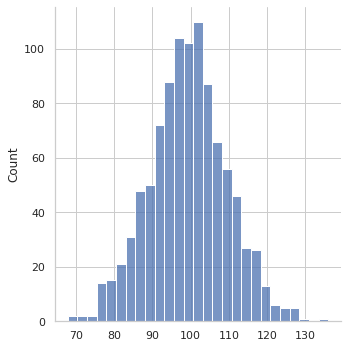

In [3]:
#Визуализируем 
sns.displot(population, kde = False)

In [4]:
#Средене значние и стандартное отклонение
population.mean()
population.std()

10.116798923691228

In [5]:
#Получение выборочного среднего
sample_size = 30 #можно менять размер выбороки  и из-за этого будет меняться стандартная ошибка среднего
sample = np.random.choice(population, sample_size, False)
sample.mean()

98.305

In [6]:
n = 10000
sample_means = []
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_means.append(sample.mean())

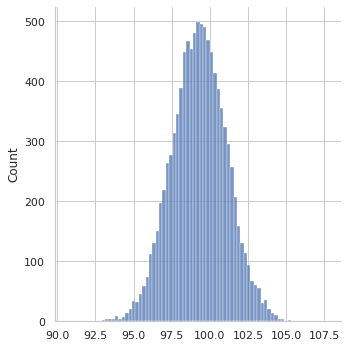

In [7]:
sns.displot(sample_means, kde = False)

правило трех сигм - 100% в этом диапазоне

правило 1.96 сигм ~ 95% в этом диапазоне

se = sigma / sqrt(n)

In [8]:
#Стандартная ошибка
se = population.std() / sample_size ** 0.5
se

1.8470663267498904

In [9]:
np.std(sample_means)

1.7893159994451893

In [10]:
# Диапазон, в котором лежит 95% наблюдений
population.mean() + 1.96 * se
population.mean() - 1.96 * se

95.70598999957019

In [11]:
sample_real = np.random.choice(population, sample_size, False)
sample_real

array([ 93.88,  90.16,  97.38, 103.07,  90.28,  79.21,  94.91,  98.64,
        90.36,  80.13, 101.42,  81.32, 100.78,  98.18,  97.56,  85.94,
       105.77,  93.78,  92.37,  97.16, 105.38, 120.69,  94.85,  89.81,
       110.99, 102.55, 107.14,  99.42,  97.34, 103.2 ])

In [12]:
sample_real.mean()
sample_real.std()
se = sample_real.std() / sample_size ** 0.5
se

1.6205397831861117

In [13]:
#как вычислить z значение
(104 - 100)/se # значение лежит правее на более чем 2 сигмы

2.4683133616970996

In [14]:
z_scores = []
n = 10000

mu = population.mean()
sigma = population.std()

se = sigma / sample_size ** 0.5

for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    
    z_score = (sample_mean - mu) / se
    z_scores.append(z_score)

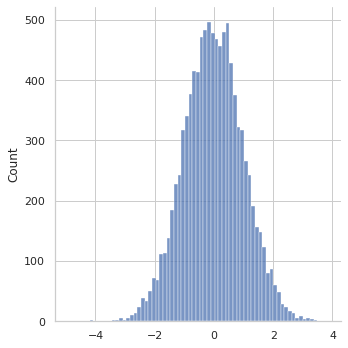

In [15]:
sns.displot(z_scores, kde=False) # Z-распределение

In [16]:
#Рассчет z-значения для конкретной выборки

t_scores = []

n = 10000
for i in range(n):
    sample = np.random.choice(population, sample_size, False)
    sample_mean = sample.mean()
    sample_std = sample.std()
    
    se = sample_std / sample_size ** 0.5
    t_score = (sample_mean - mu) / se
    t_scores.append(t_score)

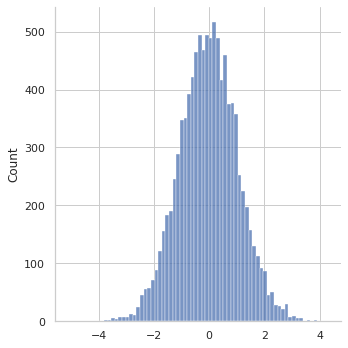

In [17]:
sns.displot(t_scores, kde=False)

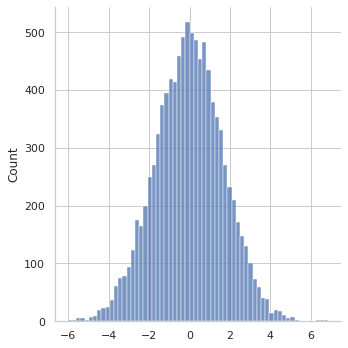

In [18]:
#Что будет если сделать sample size поменьше - для Z-score ничего не изменилось

sample_size_1 = 10
z_scores_1 = []
n = 10000

for i in range(n):
    sample_1 = np.random.choice(population, sample_size_1, False)
    sample_mean_1 = sample_1.mean()
    
    
    z_score_1 = (sample_mean_1 - mu) / se
    z_scores_1.append(z_score_1)
    
sns.displot(z_scores_1, kde=False)

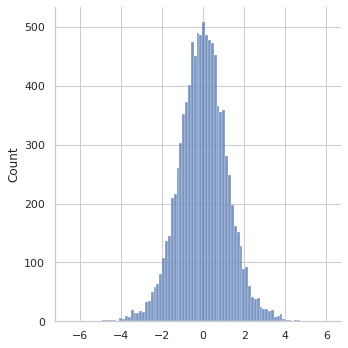

In [19]:
#Что будет если сделать sample size поменьше - а вот для t-scores
t_scores_1 = []
sample_size_1 = 10 #можно менять размер выборки, что бы посмотреть как изменяется распределение
n = 10000
for i in range(n):
    sample_12 = np.random.choice(population, sample_size_1, False)
    sample_mean_12 = sample_12.mean()
    sample_std_12 = sample_12.std()
    
    se_ = sample_std_12 / sample_size_1 ** 0.5
    t_score_1 = (sample_mean_12 - mu) / se_
    t_scores_1.append(t_score_1)

sns.displot(t_scores_1, kde=False)

In [20]:
sample_real.mean() + 2 * se

100.57490927675926

In [21]:
sample_real.mean() - 2 * se

93.00309072324072

In [22]:
df = sample_size - 1 #число степеней свободы

In [23]:
sample_real.mean() + 2.93 * se
sample_real.mean() - 2.93 * se

91.24264290954767

# T-test

    stats.ttest_ind(a, b)

### Тесты для проверки нормальности распределения:

- Тест Колмогорова-Смирнова
- Тест Шапиро-Уилка 

        from scipy import stats
        stats.shapiro(x)

### U-критерий Манна-Уитни

Переводит все данные в ранговую шкалу, после этого считает сумму рангов в первой группе и во второй. 
Этот критерий менее чувствителен к экстремальным отклонениям от нормальности и наличию выбросов. 

Этот критерий не сравнивает средние. 
Наиболее частая его интерпретация - он проверяет, что вероятность случайно взять из первой выборки более высокое значение, 
чем из второй, равна 50%. 
Соответственно, если вероятность не равна 50%, то в какой-то из выборок более высокие значения встречаются чаще.

In [24]:
males = [19, 22, 16, 29, 24]
females = [20, 11, 17, 12]

In [25]:
from scipy.stats import mannwhitneyu
U1, p = mannwhitneyu(males, females, method="exact")
print(U1)

17.0


mannwhitneyu всегда сообщает статистику, связанную с первой выборкой, которой в данном случае являются мужчины.

In [26]:
nx, ny = len(males), len(females)
U2 = nx*ny - U1
print(U2)

3.0


In [27]:
p

0.1111111111111111

Точное распределение тестовой статистики асимптотически нормально, поэтому пример продолжается сравнением точного значения p со значением p, полученным с использованием нормального приближения.

In [28]:
_, pnorm = mannwhitneyu(males, females, method="asymptotic")
print(pnorm)

0.11134688653314041


Сообщаемое здесь значение p противоречит значению mnw. Причина в том, что не применяется поправка на непрерывность, выполняемая mannwhitneyu; 

mannwhitneyu уменьшает расстояние между тестовой статистикой и средним значением на 0.5, чтобы исправить тот факт, что дискретная статистика сравнивается с непрерывным распределением. 

Используемая здесь статистика меньше среднего значения, поэтому мы уменьшаем расстояние, добавляя 0.5 в числитель.

In [29]:
from scipy.stats import norm
U = min(U1, U2)
N = nx + ny
z = (U - nx*ny/2 + 0.5) / np.sqrt(nx*ny * (N + 1)/ 12)
p = 2 * norm.cdf(z)  # use CDF to get p-value from smaller statistic
print(p)

0.11134688653314041


При желании мы можем отключить коррекцию непрерывности

In [30]:
_, pnorm = mannwhitneyu(males, females, use_continuity=False,
                        method="asymptotic")
print(pnorm)

0.0864107329737


Независимо от того, выполняем ли мы точный или асимптотический тест, вероятность того, что статистика теста случайно окажется экстремальной или более экстремальной, превышает 5%, поэтому мы не считаем результаты статистически значимыми.

Предположим, что еще до просмотра данных мы предположили, что у женщин, как правило, диагноз диагностируется в более молодом возрасте, чем у мужчин. В этом случае было бы естественно указать возраст женщин в качестве первых входных данных, и мы бы провели односторонний тест, используя : женщинам диагностируется в возрасте, который стохастически меньше, чем у мужчин (alternative = 'less')

In [31]:
res = mannwhitneyu(females, males, alternative="less", method="exact")
print(res)

MannwhitneyuResult(statistic=3.0, pvalue=0.05555555555555555)


Опять же, вероятность случайного получения достаточно низкого значения тестовой статистики при нулевой гипотезе превышает 5%, поэтому мы не отвергаем нулевую гипотезу в пользу нашей альтернативы.

Если разумно предположить, что средние значения выборок из популяций нормально распределены, мы могли бы использовать **t-критерий** для выполнения анализа.

In [32]:
from scipy.stats import ttest_ind
res = ttest_ind(females, males, alternative="less")
print(res)

Ttest_indResult(statistic=-2.239334696520584, pvalue=0.030068441095757924)


При этом предположении значение p будет достаточно низким, чтобы отвергнуть нулевую гипотезу в пользу альтернативы.

Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). 

Используя t-критерий, проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами статистически достоверными.

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

In [35]:
from scipy import stats
stats.ttest_ind_from_stats(45, 9, 100, 34, 10, 100)
# mean1, std1, nobs1, mean2, std2, nobs2

Ttest_indResult(statistic=8.176235608718828, pvalue=3.4555440142902684e-14)

In [36]:
# средние значения выборки
x1 = 45
x2 = 34

# стандартные отклонения выборки
sd1 = 9
sd2 = 10

# количество наблюдений
n1 = 100
n2 = 100

# кол-во степеней свободы
df = n1 + n2 - 2

# непосредственно расчёт t-значения
t = (x1-x2)/(sd1**2/n1 + sd2**2/n2) ** 0.5

# подсчёт p-значения
p = stats.t.sf(np.abs(t), df)*2

# вывод результата
print('t-statistic = {} p-value = {}'.format(t,p))


t-statistic = 8.176235608718828 p-value = 3.4555440142902684e-14


In [37]:
# подтверждение или опровержение нулевой гипотезы
if p < 0.05:
    print('H0 rejected')
else:
    print('H0 confirmed')

H0 rejected


# ПРОЕКТ

Представьте, что вы работаете аналитиком в очень крупной компании по доставке пиццы над приложением для курьеров.

У вас есть несколько ресторанов в разных частях города и целый штат курьеров. Но есть одна проблема — к вечеру скорость доставки падает из-за того, что курьеры уходят домой после рабочего дня, а количество заказов лишь растет. Это приводит к тому, что в момент пересмены наша доставка очень сильно проседает в эффективности. 

Наши data scientist-ы придумали новый алгоритм, который позволяет курьерам запланировать свои последние заказы перед окончанием рабочего дня так, чтобы их маршрут доставки совпадал с маршрутом до дома. То есть, чтобы курьеры доставляли последние свои заказы за день как бы "по пути" домой. 

Вы вместе с командой решили раскатить A/B тест на две равные группы курьеров. Часть курьеров использует старый алгоритм без опции "по пути", другие видят в своем приложении эту опцию и могут ее выбрать. Ваша задача – проанализировать данные эксперимента и помочь бизнесу принять решение о раскатке новой фичи на всех курьеров.

### Описание данных
- order_id - id заказа
- delivery_time - время доставки в минутах
- district - район доставки
- experiment_group - экспериментальная группа

In [38]:
experiment = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-a-eremina/statistics/experiment_lesson_4.csv')

In [39]:
experiment.head()

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control


In [40]:
experiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20196 entries, 0 to 20195
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          20196 non-null  int64  
 1   delivery_time     20196 non-null  float64
 2   district          20196 non-null  object 
 3   experiment_group  20196 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 631.2+ KB


Для начала давайте сформулируем гипотезы для проверки. Выберите статистические гипотезы, которые мы сможем проверить в этом эксперименте:

- **Альтернативная гипотеза (H1): Разница между средним временем доставки в тестовой и контрольной группе есть**
- Альтернативная гипотеза (H1): Изменение алгоритма влияет на скорость доставки
- **Нулевая гипотеза (H0): Разницы между средним временем доставки в тестовой и контрольной группе нет**
- Нулевая гипотеза (H0): Разница между средним временем доставки в тестовой и контрольной группе есть
- Нулевая гипотеза (H0): Изменение алгоритма не влияет на скорость доставки
- Альтернативная гипотеза (H1): Разницы между средним временем доставки в тестовой и контрольной нет

Сопоставьте графики распределения и  экспериментальные группы:

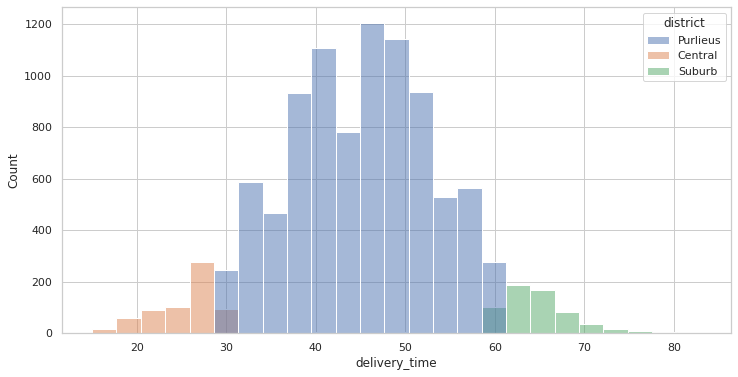

In [41]:
sns.histplot(data = experiment.query('experiment_group == "control"'), hue = 'district', bins = 25, x = 'delivery_time')

# другой способ
# experiment.query('experiment_group == "control"').groupby('district').delivery_time.hist()

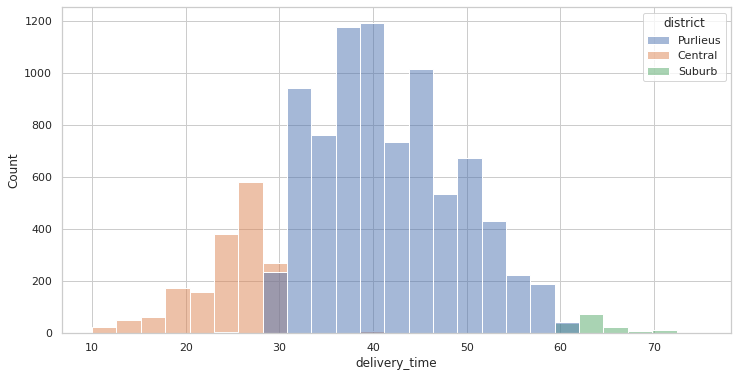

In [42]:
sns.histplot(data = experiment.query('experiment_group == "test"'), hue = 'district', bins = 25, x = 'delivery_time')

Посчитайте количество наблюдений в тестовой и контрольной группе. 
На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [43]:
abs(experiment.query('experiment_group == "control"').order_id.count() - experiment.query('experiment_group == "test"').order_id.count())

12

In [44]:
experiment.groupby('experiment_group', as_index = False).order_id.count()

,experiment_group,order_id
0,control,10092
1,test,10104


In [45]:
# Другой способ:
experiment.groupby('experiment_group').size()

experiment_group
control    10092
test       10104
dtype: int64

Теперь давайте изучим наши распределения. 

Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.
Вообще для выборок таких колоссальных размеров мы не обязаны это делать - в отсутствие слишком уж выраженной асимметрии и выбросов в данных t-тест и так работать будет нормально, но посмотреть лишний раз всё равно можно 

Обычно нормальность тестируют с помощью теста Шапиро-Уилка (scipy.stats.shapiro()), однако на больших выборках этот тест слишком рьяно находит отклонения от нормальности! 

Поэтому используйте функцию scipy.stats.normaltest() - она больше адаптирована к большим выборкам:

In [49]:
# для начала стандартное отклонение

experiment.groupby("experiment_group").delivery_time.std()

experiment_group
control    9.990017
test       9.883308
Name: delivery_time, dtype: float64

In [47]:
experiment_control = experiment.query('experiment_group == "control"').delivery_time

st.normaltest(experiment_control)

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [48]:
experiment_test = experiment.query('experiment_group == "test"').delivery_time

st.normaltest(experiment_test)

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [50]:
# через пакет pingouin 
pg.normality(data=experiment, dv="delivery_time", 
                   group="experiment_group", method="normaltest")

,W,pval,normal
control,0.253498,0.880955,True
test,7.024157,0.029835,False


In [51]:
# вариант с сэмплированием

st.shapiro(experiment.query("experiment_group == 'control'").delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9974725842475891, pvalue=0.12411931157112122)

In [52]:
st.shapiro(experiment.query("experiment_group == 'test'").delivery_time.sample(1000, random_state=17))

ShapiroResult(statistic=0.9975479245185852, pvalue=0.14013493061065674)

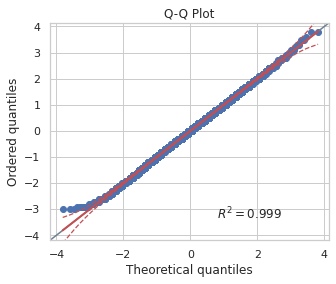

In [53]:
# вариант с qq-плотами

pg.qqplot(experiment.query("experiment_group == 'control'").delivery_time)

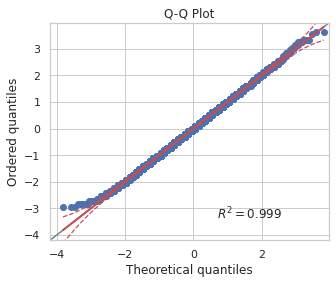

In [54]:
pg.qqplot(experiment.query("experiment_group == 'test'").delivery_time)

Теперь пришло время сравнить средние в тесте и контроле. 

Здесь уже не нужно пользоваться методом .sample() — он нам нужен был только для теста Шапиро-Уилка, остальные тесты надо проводить на полных данных.

In [55]:
stats.ttest_ind(experiment_test, experiment_control)

# через пингвин:
# pg.ttest(x=experiment_test, y=experiment_control)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

In [57]:
#попробуем для сравнения Манна-Уитни

st.mannwhitneyu(x=experiment_test, y=experiment_control)
# pg.mwu(x=experiment_test, y=experiment_control)

MannwhitneyuResult(statistic=33985060.0, pvalue=0.0)

In [58]:
st.ttest_ind(a=experiment_test, b=experiment_control, trim=0.2)
# ттест Юэна, убирает выбросы

Ttest_indResult(statistic=-42.16055367343425, pvalue=0.0)

In [59]:
# permutation t-test (перестановочный тест)
st.ttest_ind(a=experiment_test, b=experiment_control, permutations = 1000)

Ttest_indResult(statistic=-43.03582663183714, pvalue=0.0)

На сколько процентов изменилось среднее время доставки в тестовой группе по сравнению с контрольной (округлите до сотых)?

In [60]:
abs(((experiment_test.mean() - experiment_control.mean()) / experiment_control.mean() * 100).round(2))

13.35

Что в итоге? Катим? 

- Не катим, так как среднее время доставки статистически значимо не изменилось.
- Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте больше, чем в контроле.
- **Да, раскатываем новый алгоритм на всех, так как среднее время доставки статистически значимо изменилось. Среднее время доставки в тесте меньше, чем в контроле.**
- Да, раскатываем на всех, новый алгоритм напрямую влияет на скорость доставки.